In [1]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import datetime as dt
    

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_excel("samsung_dataset_final.xlsx")
df.head()

,Date,High,Low,Close,Volume,Avg_price,Open_change,High_change,Low_change,Close_change,Volume_change,Tomorrow_Change
0,2013-01-03,1584000,1543000,1543000,277934,1563500,49000,8000,16000,-33000,51144,-42000
1,2013-01-04,1542000,1510000,1525000,256920,1526000,-42000,-42000,-33000,-18000,-21014,-25000
2,2013-01-07,1528000,1500000,1520000,250247,1514000,-25000,-14000,-10000,-5000,-6673,-2000
3,2013-01-08,1517000,1498000,1500000,264689,1507500,-2000,-11000,-2000,-20000,14442,-13000
4,2013-01-09,1513000,1491000,1500000,250029,1502000,-13000,-4000,-7000,0,-14660,15000


In [3]:
#delete volume and volume change column 
df=df.drop('Volume', axis =1)
df=df.drop('Volume_change',axis=1)

In [4]:
df.head()

,Date,High,Low,Close,Avg_price,Open_change,High_change,Low_change,Close_change,Tomorrow_Change
0,2013-01-03,1584000,1543000,1543000,1563500,49000,8000,16000,-33000,-42000
1,2013-01-04,1542000,1510000,1525000,1526000,-42000,-42000,-33000,-18000,-25000
2,2013-01-07,1528000,1500000,1520000,1514000,-25000,-14000,-10000,-5000,-2000
3,2013-01-08,1517000,1498000,1500000,1507500,-2000,-11000,-2000,-20000,-13000
4,2013-01-09,1513000,1491000,1500000,1502000,-13000,-4000,-7000,0,15000


In [5]:
X_dataset=df.iloc[:,1:9].values
Y_dataset=df.iloc[:,9 ].values.reshape(-1,1)

In [6]:
#we will check the accuracy for test size=0.1 ,0.20,.3 (90% ,80%, 70%)
test=[0.1,0.2,0.3]
#Open an xlsx for reading
wb = load_workbook('ModelAccuracy.xlsx')
#Get the current Active Sheet
ws = wb.get_active_sheet()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  


In [7]:
#multiple linear regression
c=2
for i in range(0,len(test)):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=test[i], random_state=0)
    multiple_linear_regression=LinearRegression() #define 
    multiple_linear_regression.fit(X_train,y_train) #fit model 
    score=multiple_linear_regression.score(X_test, y_test)
    ws.cell(row=2,column=1).value="Multiple linear regression"
    ws.cell(row=2,column=c).value=format((score*100), '.2f')
    c=c+1

In [8]:
#Decision Tree regression
c=2
for i in range(0,len(test)):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=test[i], random_state=0)
    Decision_Tree=DecisionTreeRegressor(random_state=0) #define 
    Decision_Tree.fit(X_train,y_train) #fit model 
    score=Decision_Tree.score(X_test, y_test)
    ws.cell(row=3,column=1).value="Decision Tree regression"
    ws.cell(row=3,column=c).value=format((score*100), '.2f')
    c=c+1

In [9]:
#Random forest regression

c=2
for i in range(0,len(test)):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=test[i], random_state=0)
    Random_Forest=RandomForestRegressor(random_state=0) #define 
    Random_Forest.fit(X_train,y_train) #fit model 
    score=Random_Forest.score(X_test, y_test)
    ws.cell(row=4,column=1).value="Random forest regression"
    ws.cell(row=4,column=c).value=format((score*100), '.2f')
    c=c+1

In [10]:
#SVR regression
#for using SVR feature scalling is to be done
X=StandardScaler()
Y=StandardScaler()
X_dataset=X.fit_transform(X_dataset)
Y_dataset=Y.fit_transform(Y_dataset)
c=2
for i in range(0,len(test)):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=test[i], random_state=0)
    SVR_reg=SVR() #define 
    SVR_reg.fit(X_train,y_train) #fit model 
    score=SVR_reg.score(X_test, y_test)
    ws.cell(row=5,column=1).value="SVR regression"
    ws.cell(row=5,column=c).value=format((score*100), '.2f')
    c=c+1

In [11]:
wb.save('ModelAccuracy.xlsx')

In [12]:
#visualize the result
df_mod=pd.read_excel('ModelAccuracy.xlsx')
df_mod

,Regression Model,Accuracy (Test size = 0.1),Accuracy (Test size = 0.2),Accuracy (Test size = 0.3)
0,Multiple linear regression,73.21,65.79,60.94
1,Decision Tree regression,27.52,6.19,14.13
2,Random forest regression,43.48,48.67,46.56
3,SVR regression,56.60,53.55,51.77


In [13]:
#multiple linear regression shows the best result 
#let us visualize the result for multiple linear regression
df['Date'] = pd.to_datetime(df['Date'])
X_dataset_visual=df.iloc[:,0:9]
Y_dataset_visual=df.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X_dataset_visual,Y_dataset_visual,test_size=0.1, random_state=0)

In [14]:
#predicted value from model
X_test1=X_test.iloc[:,1:]
pred=multiple_linear_regression.predict(X_test1)


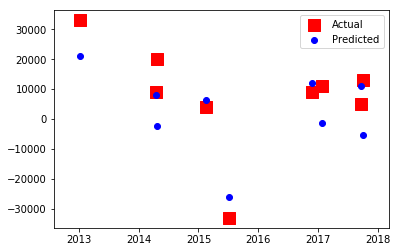

In [15]:
#for visualization plotting only 10 instances
pred1=pred[1:10]
y_test1=y_test[1:10]
dates=np.asarray(X_test.iloc[1:10, 0])
plt.scatter(dates,y_test1,color="red",s=150,marker='s',label="Actual")
plt.scatter(dates,pred1,color="blue",label="Predicted")
plt.legend()
plt.legend(loc="bottom right")
plt.show()